# Example 3 - Create IDT contacts

In this example, the goal is to create a basic setup for the characterization using a Vector Network Analyzer (VNA).

This setup consists in two identical IDTs separated by an chosen distance. A simple contact and a surrounding ground plane will be added.

Furthermore, a broandband detector can be added in the middle of the channel to perform time-dependent measurements of the Surface Acoustic Wave (SAW) profile as described in Junliang Wang et al. XXX (2021).

## Imports

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from idtpy import designer

<IPython.core.display.Javascript object>


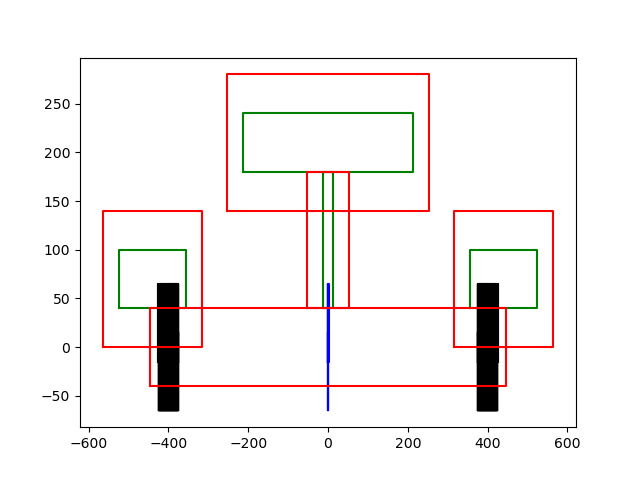

<AxesSubplot:>

In [2]:
plt.close('all')
fig, ax = plt.subplots(1)

""" Create regular IDTs """
reg_left = designer.Regular(freq=1,vsaw=1,Np=50,w=30,l=50,Nehp=2,tfact=1)
reg_left.align('c')
reg_left.translate(dx=-400)
reg_left.show(ax, color='k')

reg_right = reg_left.copy()
reg_right.reflect(y=True,local=False)
reg_right.show(ax, color='k')

""" 
Create the contact of the IDT 
For the IDT contact, use the method idtpy.designer.idt_contact
To have a better idea of each argument, please, check idt_contact.pdf
In order to generate the contacts, we usually use positive and negative rectangles.
"""
for idt, loc in zip([reg_left, reg_right], ['tl','tr']):
    pos, neg = designer.idt_contact(idt,dx=100,dy=60,loc=loc,gap=40,clen=25,ext=20)
    pos.show(ax, color='g')
    neg.show(ax, color='r')

""" Create a broadband SAW detector """
det = designer.Regular(freq=1,vsaw=1,Np=1.5,w=30,l=50,Nehp=2,tfact=1)
det.reflect('x',local=True) # flip upside down to contact only 2 pairs of fingers
det.show(ax,color='b')

""" 
Create contacts for the detector IDT 
Detector contact is a T shape contact for IDT with few electrodes.
Use the method: idtpy.designer.det_contact
Check det_contact.pdf for more information
"""
pos, neg = designer.det_contact(det,sdx=25,h=100,clen=25,dy=60,left=200,right=200,gap=40,loc='t')
pos.show(ax,color='g')
neg.show(ax,color='r')

""" 
Create a channel
To define a channel actually we only need a negative rectangle between 2 IDTs
Use the method channel(idt1, idt2, clen=25,gap=20)
Check channel.pdf for more information
"""
pos, neg = designer.channel(reg_left, reg_right, clen=25,gap=20) # pos is actually empty
pos.show(ax,color='g')
neg.show(ax,color='r')